<a href="https://colab.research.google.com/github/Chandni0369/ML-LAB-D11ADA-57/blob/main/exp%209/ML_exp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

def xor_function(x1, x2):
    return np.logical_xor(x1, x2).astype(int)

N = 1000  # number of samples
X = np.random.randint(0, 2, (N, 2))
y = np.array([xor_function(x[0], x[1]) for x in X]).reshape(N, 1)

print("Sample data:\n", np.hstack((X, y))[:10])

Sample data:
 [[0 1 1]
 [0 0 0]
 [0 1 1]
 [0 0 0]
 [0 1 1]
 [0 0 0]
 [0 0 0]
 [1 0 1]
 [1 1 0]
 [1 0 1]]


In [2]:
input_size = 2
hidden_size = 2
output_size = 1

W1 = np.random.uniform(-1, 1, (input_size, hidden_size))
b1 = np.zeros((1, hidden_size))
W2 = np.random.uniform(-1, 1, (hidden_size, output_size))
b2 = np.zeros((1, output_size))

lr = 0.1  # learning rate
epochs = 2000

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [4]:
loss_history = []
W1_changes, W2_changes = [], []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)

    # Loss (Mean Squared Error)
    loss = np.mean((y - output) ** 2)
    loss_history.append(loss)

    # Backpropagation
    error = y - output
    d_output = error * sigmoid_derivative(output)

    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    # Store weights before update
    W1_prev, W2_prev = W1.copy(), W2.copy()

    # Update weights and biases
    W2 += a1.T.dot(d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr
    W1 += X.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    # Record change in weights
    W1_changes.append(np.linalg.norm(W1 - W1_prev))
    W2_changes.append(np.linalg.norm(W2 - W2_prev))

    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 0.2592
Epoch 200: Loss = 0.1807
Epoch 400: Loss = 0.1862
Epoch 600: Loss = 0.1780
Epoch 800: Loss = 0.1599
Epoch 1000: Loss = 0.1895
Epoch 1200: Loss = 0.1958
Epoch 1400: Loss = 0.1635
Epoch 1600: Loss = 0.1835
Epoch 1800: Loss = 0.2296


In [5]:
loss_history = []
W1_changes, W2_changes = [], []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)

    # Loss (Mean Squared Error)
    loss = np.mean((y - output) ** 2)
    loss_history.append(loss)

    # Backpropagation
    error = y - output
    d_output = error * sigmoid_derivative(output)

    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    # Store weights before update
    W1_prev, W2_prev = W1.copy(), W2.copy()

    # Update weights and biases
    W2 += a1.T.dot(d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr
    W1 += X.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    # Record change in weights
    W1_changes.append(np.linalg.norm(W1 - W1_prev))
    W2_changes.append(np.linalg.norm(W2 - W2_prev))

    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 0.2299
Epoch 200: Loss = 0.2300
Epoch 400: Loss = 0.2300
Epoch 600: Loss = 0.2292
Epoch 800: Loss = 0.2300
Epoch 1000: Loss = 0.2299
Epoch 1200: Loss = 0.2300
Epoch 1400: Loss = 0.2300
Epoch 1600: Loss = 0.2299
Epoch 1800: Loss = 0.2300


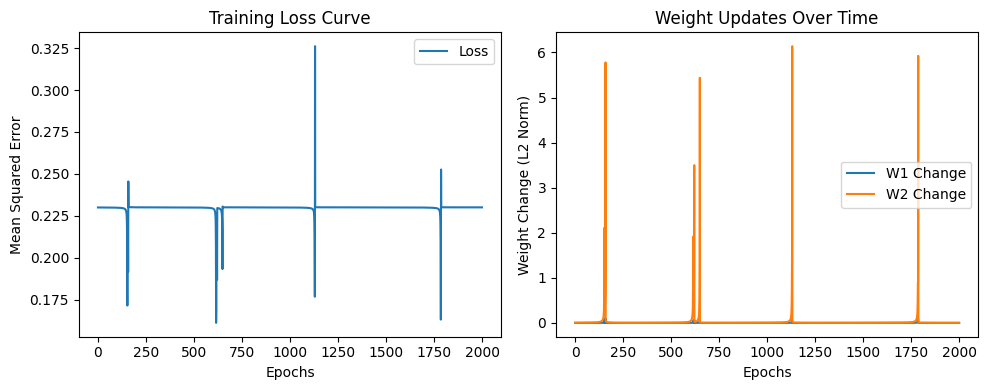

In [6]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(loss_history, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(W1_changes, label='W1 Change')
plt.plot(W2_changes, label='W2 Change')
plt.xlabel('Epochs')
plt.ylabel('Weight Change (L2 Norm)')
plt.title('Weight Updates Over Time')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
X_test = np.array([[0,0],[0,1],[1,0],[1,1]])
z1 = np.dot(X_test, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
y_pred = sigmoid(z2)

print("\nXOR Gate Prediction after training:\n")
df = pd.DataFrame(np.column_stack((X_test, np.round(y_pred))), columns=['X1','X2','Predicted Output'])
print(df)


XOR Gate Prediction after training:

    X1   X2  Predicted Output
0  0.0  0.0               0.0
1  0.0  1.0               1.0
2  1.0  0.0               1.0
3  1.0  1.0               1.0
